# Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from scipy.stats.mstats import winsorize

In [134]:
def set_global_styles():
    # Set the style for seaborn so I can make the to be yellow
    # (i prefer it cause its more "eye friendly" xixixixixi)
    sns.set_style({"axes.facecolor": "lightyellow",
                "figure.facecolor": "lightyellow"})

    # this one is for matplotlib
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['axes.facecolor'] = 'lightyellow'
    plt.rcParams['figure.facecolor'] = 'lightyellow'

set_global_styles()

# Data

a. person_age = Usia dari orang tersebut <br>
b. person_gender = Gender dari orang tersebut<br>
c. person_education = Tingkat pendidikan tertinggi<br>
d. person_income = Pendapatan tahunan<br>
e. person_emp_exp = Tahun pengalaman bekerja<br>
f. person_home_ownership = Status kepemilikan tempat huni<br>
g. loan_amnt = Jumlah pinjaman yang diminta<br>
h. loan_intent = Tujuan dari pinjaman<br>
i. loan_int_rate = Suku bunga pinjaman<br>
j. loan_percent_income = Jumlah pinjaman sebagai persentase dari pendapatan tahunan<br>
k. cb_person_cred_hist_length = Durasi kredit dalam tahun<br>
l. credit_score = Skor kredit dari orang tersebut<br>
m. previous_loan_defaults_on_file = Indikator tunggakan pinjaman sebelumnya<br>
n. loan_status (target variable) = Persetujuan pinjaman; 1: diterima dan 0: ditolak<br>

## Exploratory Data Analysis

## Structure of the data

In [135]:
df = pd.read_csv('Dataset_A_loan.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [137]:
print(df.duplicated().sum())

0


In [138]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## Further EDA

### Categorical - Numerical Distribution

To see the data better i think its better to split them into categorical and numerical group

In [139]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])
categorical_data = df.select_dtypes(include=['object'])

Lets see the categorical data unique values first

In [140]:
# Checking unique values for all the columns  of the data
for col in categorical_data.columns:
    print(f'{col}: {categorical_data[col].unique()}')

person_gender: ['female' 'male' 'Male' 'fe male']
person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loan_defaults_on_file: ['No' 'Yes']


There is a little bit of anomaly from the data where 'female' is difference from 'fe male' and 'male' is different from 'Male' so it would be better for us to preprocess it a little bit before going more on data analysis

In [141]:
df['person_gender'] =  df['person_gender'].map({'Male':'male', 'fe male':'female', 'female':'female', 'male':'male'})
numerical_data = df.select_dtypes(include=['int64', 'float64'])
categorical_data = df.select_dtypes(include=['object'])
df['person_gender'].unique()

array(['female', 'male'], dtype=object)

on now we're good for the categorical data anomalies lets now see the distribution of the categorical data

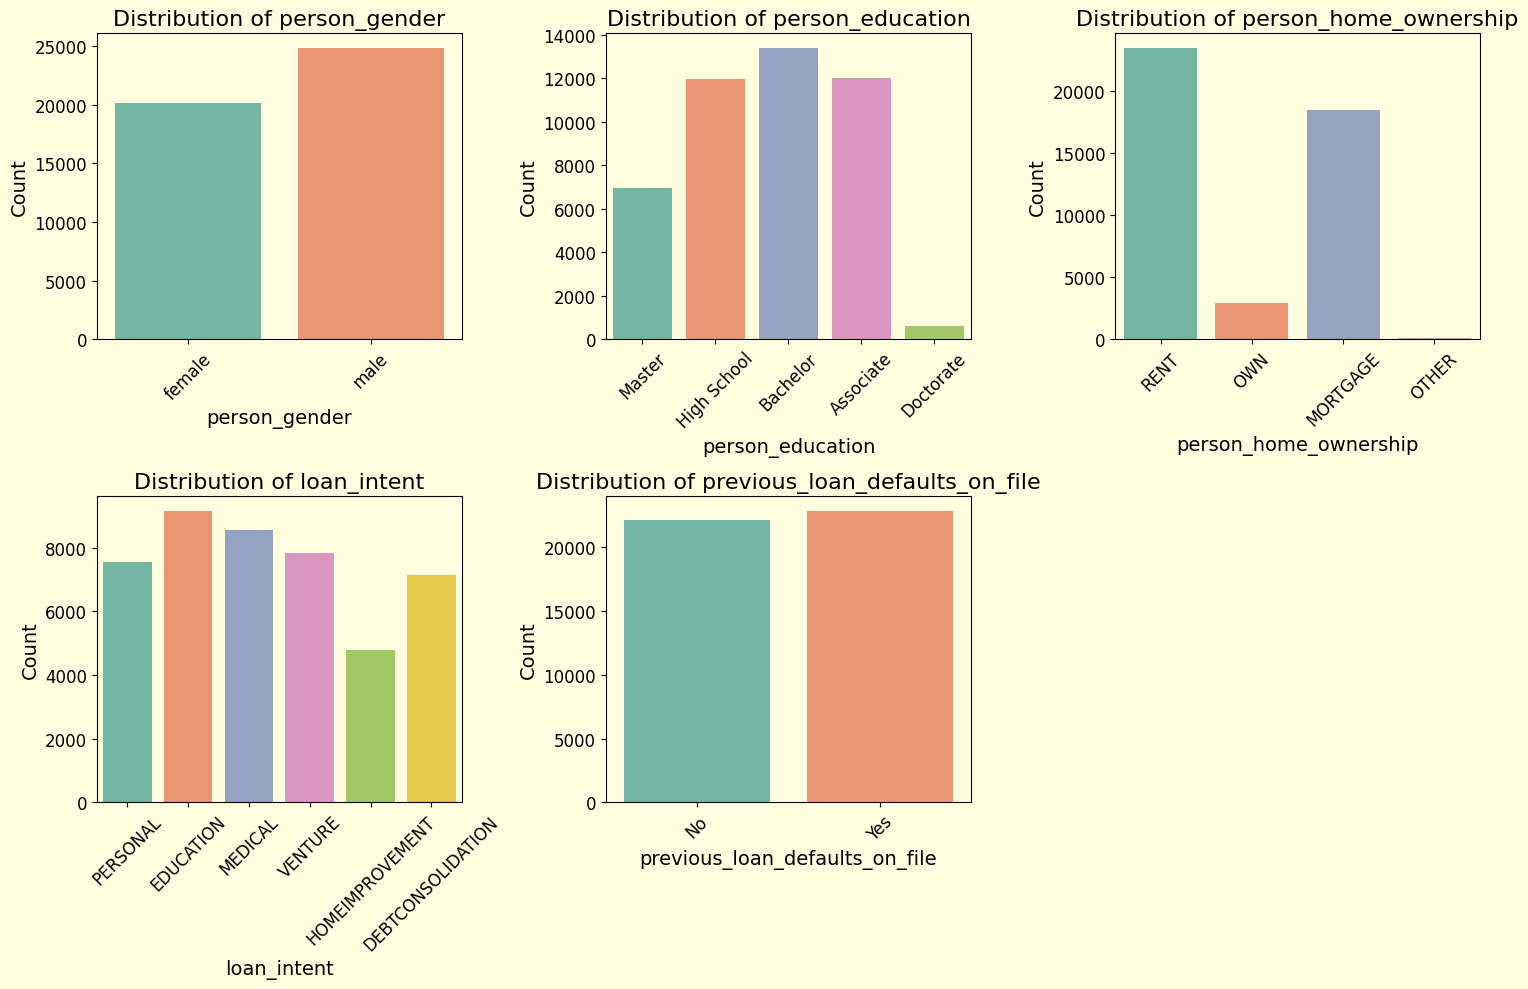

In [142]:
num_columns = 3
num_rows = int(np.ceil(len(categorical_data.columns) / num_columns))

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, col in enumerate(categorical_data.columns):
    sns.countplot(data=categorical_data, x=col, palette="Set2", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

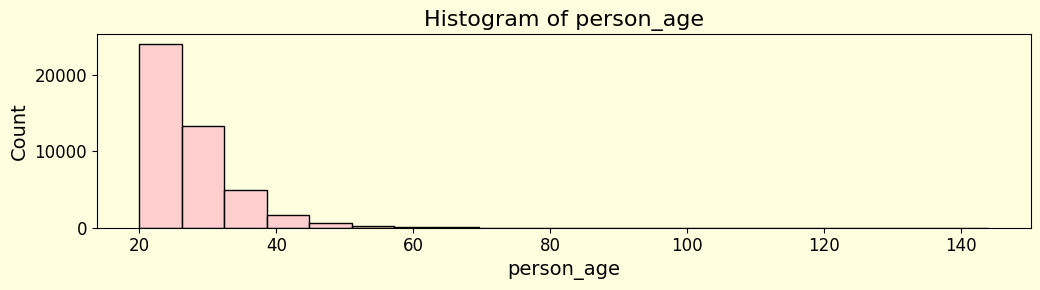

person_age - Skewness: 2.5481540050382425
person_age - Kurtosis: 18.64944898184852


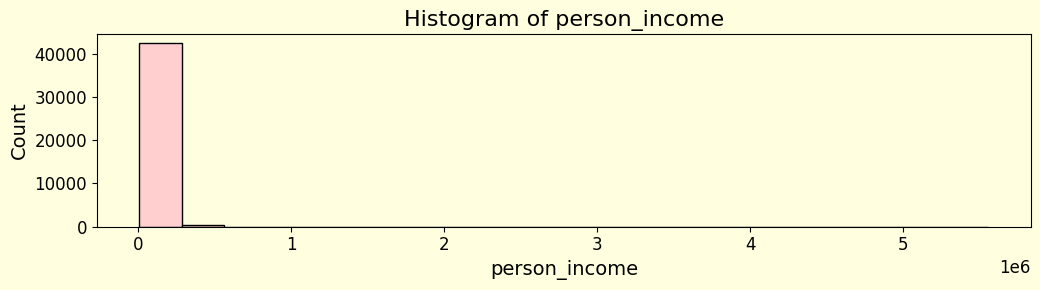

person_income - Skewness: 25.60673912825341
person_income - Kurtosis: 1569.8526113553646


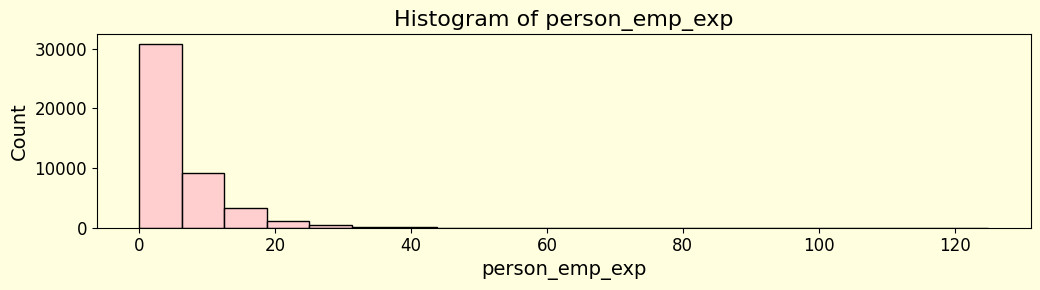

person_emp_exp - Skewness: 2.5949173726318255
person_emp_exp - Kurtosis: 19.1683237539473


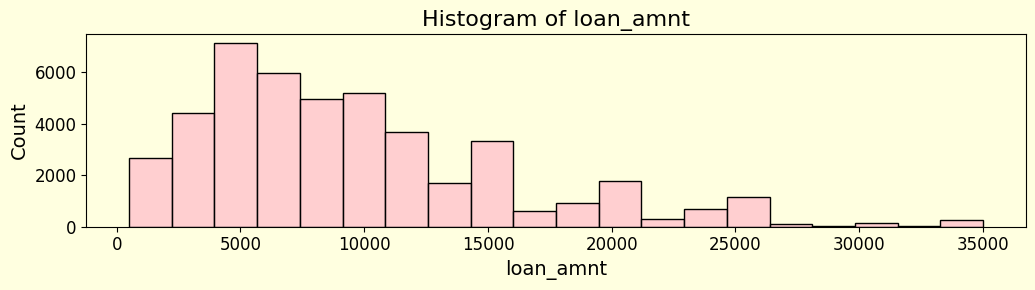

loan_amnt - Skewness: 1.1797312856279223
loan_amnt - Kurtosis: 1.3512152308228198


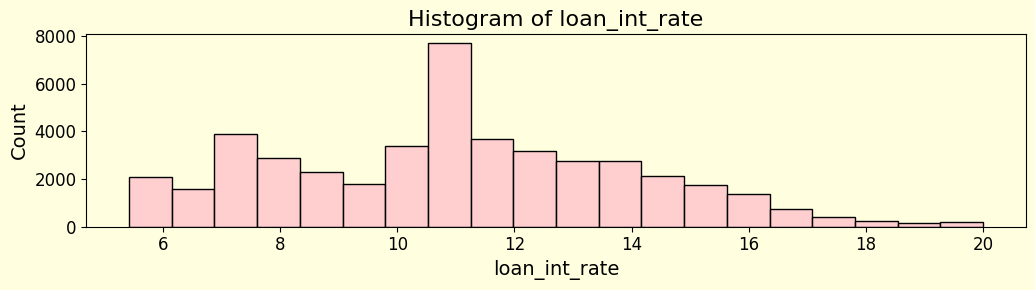

loan_int_rate - Skewness: 0.21378407238735642
loan_int_rate - Kurtosis: -0.42033530822379506


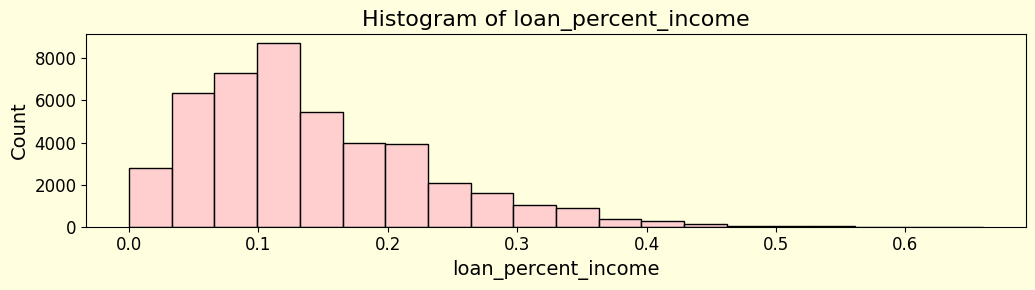

loan_percent_income - Skewness: 1.034512151182724
loan_percent_income - Kurtosis: 1.0824162412535965


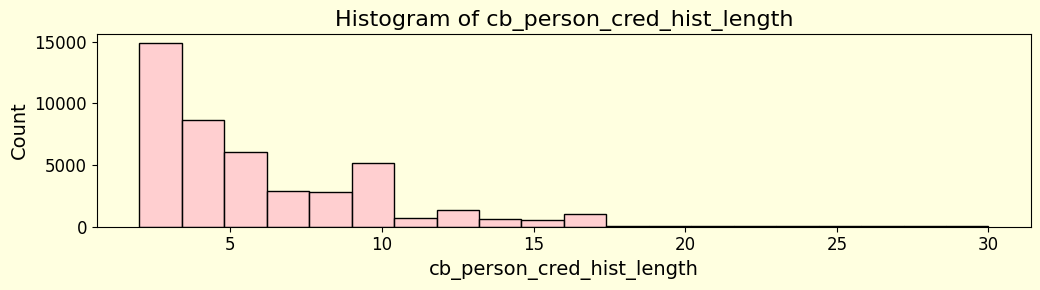

cb_person_cred_hist_length - Skewness: 1.6317199538415355
cb_person_cred_hist_length - Kurtosis: 3.725944524091197


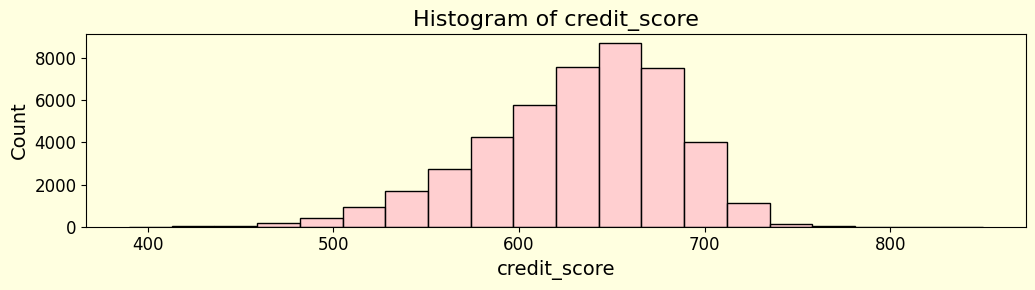

credit_score - Skewness: -0.6102608322577946
credit_score - Kurtosis: 0.20302185635702363


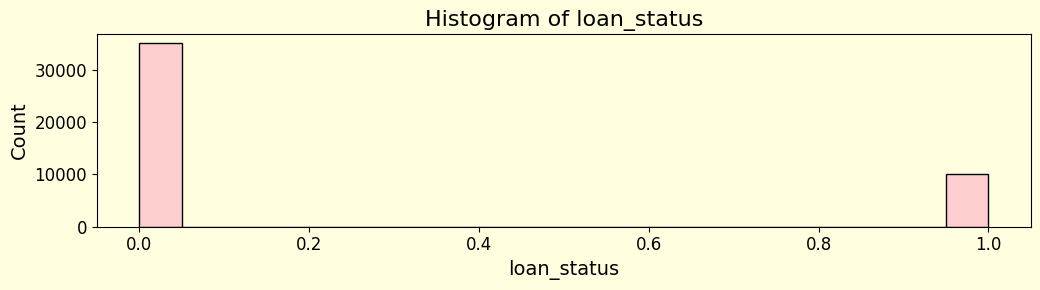

loan_status - Skewness: 1.3363507549997484
loan_status - Kurtosis: -0.21417618052832044


In [143]:
# Check outlier and distribution of numerical data
def check_distribution_outliers(dataframe, numerical):
    for col in numerical:
        if (col == 'Stage'): continue
        plt.figure(figsize=(20, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[col], bins=20, color = "pink")
        plt.title(f'Histogram of {col}')

        plt.tight_layout()
        plt.show()

        print(f'{col} - Skewness: {dataframe[col].skew()}')
        print(f'{col} - Kurtosis: {dataframe[col].kurt()}')

check_distribution_outliers(df[numerical_data.columns],numerical_data)

Here we can see that
1. Our target data is imbalance 
2. There are some outliers in some of the data, especially in age and work experience, even tho it might make sense, lets do some more data analysis to check about what should we do to those 2 data
3. About person income... well they must be rich

### Correlation of features

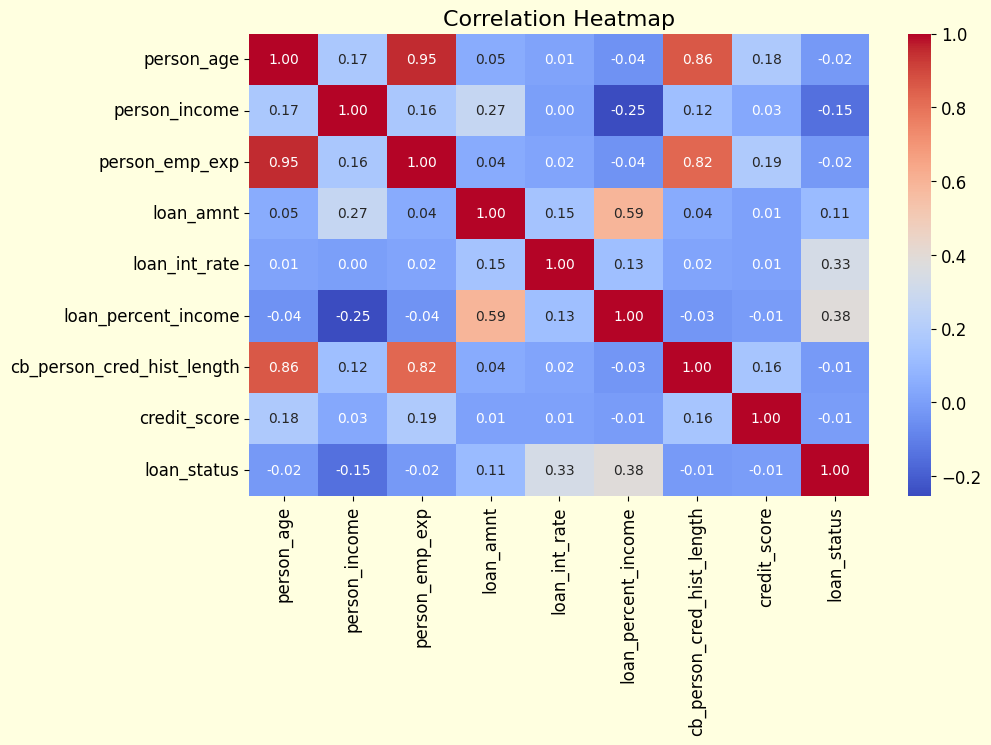

In [144]:
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Here we can see that age have a very high correlation alongside with experience and also credit history length so it can be something redundant for our model and might be better if we treat it, but before that lets check the multicollinearity first

### Multicollinearity

In [145]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

numerical_data = df.select_dtypes(include=['int64', 'float64'])
features = numerical_data.columns.drop('loan_status')
X = df[features]
X = df[features].dropna()

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)

                      Feature        VIF
0                  person_age  15.231111
1               person_income   1.547735
2              person_emp_exp  11.612989
3                   loan_amnt   2.322568
4               loan_int_rate   1.023699
5         loan_percent_income   2.202240
6  cb_person_cred_hist_length   4.135483
7                credit_score   1.030068


Here we can see that the multicollinearity is extremely high for person age and employee experience, so we have to treat it well to remove the bad multicollinearity for our model later 

# Data Preprocessing

## Missing Value Handling

There are some missing value in our data so we might want to handle it nicely

In [146]:
df.isna().sum()/df.shape[0] * 100

person_age                        0.0
person_gender                     0.0
person_education                  0.0
person_income                     5.0
person_emp_exp                    0.0
person_home_ownership             0.0
loan_amnt                         0.0
loan_intent                       0.0
loan_int_rate                     0.0
loan_percent_income               0.0
cb_person_cred_hist_length        0.0
credit_score                      0.0
previous_loan_defaults_on_file    0.0
loan_status                       0.0
dtype: float64

Well the missing value of the person income is 5% of the data, I mean we can just drop it but lets see if the people income is missing or just 0

In [147]:
df.groupby(df['person_income'].isna()).mean(numeric_only=True)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_income,,,,,,,,,
False,27.758316,80182.226222,5.403719,9590.141333,11.005214,0.139682,5.862316,632.672398,0.221520
True,27.875556,NaN,5.536000,9450.465778,11.033044,0.140538,5.965778,631.399556,0.235556


Welll the person that have the missing value have loan percent income that means that they must have an income but missing, lets just drop it

In [148]:
df.dropna(subset=['person_income'], inplace=True)
print(df['person_income'].isna().sum())

0


Now we have treated the missing values, lets now go with next preprocessing

## Dropping age

Age has cause a multicollinearity to our data, so we might just want to drop it

In [149]:
df.drop(columns=['person_age'], inplace=True)
df.head(3)

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1


In [150]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])
features = numerical_data.columns.drop('loan_status')
X = df[features]
X = df[features].dropna()

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)

                      Feature       VIF
0               person_income  1.543627
1              person_emp_exp  3.191892
2                   loan_amnt  2.322151
3               loan_int_rate  1.023482
4         loan_percent_income  2.201992
5  cb_person_cred_hist_length  3.159420
6                credit_score  1.030059


Yups, no more multicollinearity, though person_emp_exp still have some moderate one (3...), we will just let it because it doesnt get through pass 5

## Encoding

In [151]:
categorical_data = df.select_dtypes(include=['object'])
for col in categorical_data.columns:
    print(f'{col}: {categorical_data[col].unique()}')

person_gender: ['female' 'male']
person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loan_defaults_on_file: ['No' 'Yes']


In [152]:
gender_map = {'female': 0, 'male': 1}
education_map = {'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4}
home_ownership_map = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
loan_intent_map = {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5}
default_map = {'No': 0, 'Yes': 1}

df['person_gender'] = df['person_gender'].map(gender_map)
df['person_education'] = df['person_education'].map(education_map)
df['person_home_ownership'] = df['person_home_ownership'].map(home_ownership_map)
df['loan_intent'] = df['loan_intent'].map(loan_intent_map)
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(default_map)

df.head(5)


,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,0,3,71948.0,0,0,35000.0,0,16.02,0.49,3.0,561,0,1
1,0,0,12282.0,0,1,1000.0,1,11.14,0.08,2.0,504,1,0
2,0,0,12438.0,3,2,5500.0,2,12.87,0.44,3.0,635,0,1
3,0,2,79753.0,0,0,35000.0,2,15.23,0.44,2.0,675,0,1
4,1,3,66135.0,1,0,35000.0,2,14.27,0.53,4.0,586,0,1


## Train-test split

some of the processing later need a train test split because it include imputation and else and it will not be good if we get them through the test data

In [153]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [154]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f'Train set size: {x_train.shape[0]}')
print(f'Test set size: {x_test.shape[0]}')

Train set size: 34200
Test set size: 8550


## Treating the outliers

Because of the outlier in person_emp_exp is kinda doesnt make sense so i wanna winsorize just that column

<Axes: xlabel='person_emp_exp', ylabel='Count'>

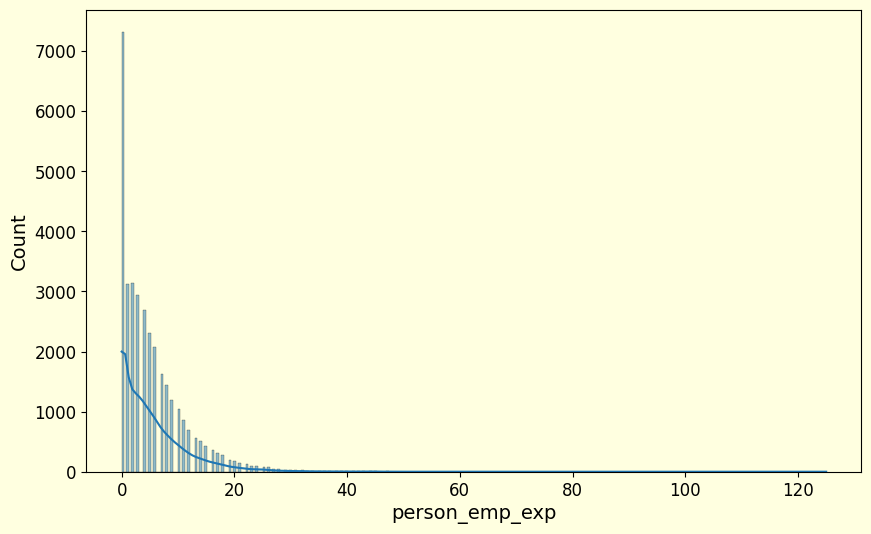

In [155]:
sns.histplot(x_train['person_emp_exp'], kde=True)

In [156]:
data_to_winsor = x_train.copy()
winsor_limit = {
    'person_emp_exp' : 0.005
}

for col, limit in winsor_limit.items():
    data_to_winsor[col] = winsorize(data_to_winsor[col], limits=[limit, limit])

<Axes: xlabel='person_emp_exp', ylabel='Count'>

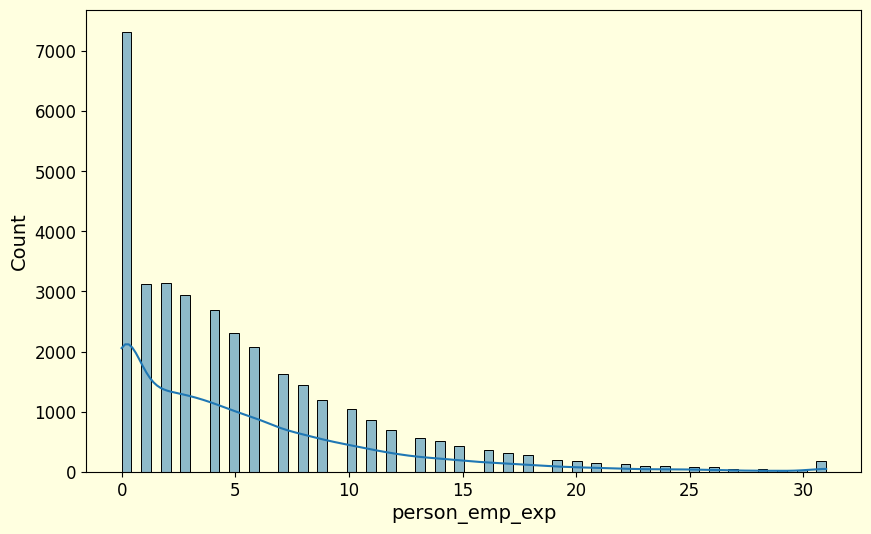

In [157]:
sns.histplot(data_to_winsor['person_emp_exp'], kde=True)

It looks like that the outliers is done well

In [158]:
x_train = data_to_winsor.copy()

## Scaling

Lets scale the data, but we only gonna scale the original numerical_data

In [159]:
numerical_cols = numerical_data.columns.drop('loan_status')
numerical_cols

Index(['person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'],
      dtype='object')

Robust scaler gonna be used for more robust result towards un-normal distributed value and also outliers

In [ ]:
scaler = RobustScaler()
scaler.fit(x_train[numerical_cols])

x_train[numerical_cols] = scaler.transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

In [161]:
x_train.head(3)

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
15132,1,1,-0.913624,-0.285714,0,-0.928571,1,0.079186,-0.416667,-0.4,-0.014493,1
16410,1,3,-0.378262,-0.571429,0,0.000000,1,0.108597,0.333333,-0.4,-0.304348,1
6178,1,2,-0.178788,-0.571429,2,1.000000,2,-0.255656,1.166667,-0.4,0.855072,0


In [168]:
x_train.columns

Index(['person_gender', 'person_education', 'person_income', 'person_emp_exp',
       'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file'],
      dtype='object')

These x_train.columns order than later will be used as order of user input in the streamlit because we dont want any mismatch of information later there.

# Modeling and Training

## XGBoost

In [162]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [163]:
y_pred_xgb = model_xgb.predict(x_test)

In [164]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6656
           1       0.89      0.79      0.84      1894

    accuracy                           0.93      8550
   macro avg       0.92      0.88      0.90      8550
weighted avg       0.93      0.93      0.93      8550



In [169]:
print(confusion_matrix(y_test, y_pred_xgb))

[[6469  187]
 [ 392 1502]]


## RandomForest

In [165]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [166]:
y_pred_rf = model_rf.predict(x_test)

In [167]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6656
           1       0.90      0.77      0.83      1894

    accuracy                           0.93      8550
   macro avg       0.92      0.87      0.89      8550
weighted avg       0.93      0.93      0.93      8550



In [170]:
print(confusion_matrix(y_test, y_pred_rf))

[[6493  163]
 [ 439 1455]]


## Conclusion

From both of the model, XGB is giving a better performance. Though both model is giving the sam eaccuracy but F1 score from XGBoost is higher than RandomForest

Therefore I will dump these progress and XGBoost model to pickle

In [42]:
import pickle

# Save the model
with open('model_xgb.pkl', 'wb') as f:
    pickle.dump(model_xgb, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save mappings and winsor limits
mappings = {
    'gender_map': gender_map,
    'education_map': education_map,
    'home_ownership_map': home_ownership_map,
    'loan_intent_map': loan_intent_map,
    'default_map': default_map,
    'numerical_cols': list(numerical_cols)
}
with open('mappings.pkl', 'wb') as f:
    pickle.dump(mappings, f)
